# 03.모델링을 위한 전처리(Dummy Variable, Scaling) 연습문제

### 라이브러리 로딩 & 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and Prepare the data

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
                 , sep=',', skipinitialspace=True)  

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


문제1) 전체에서 생존자의 비율은 몇%인가요?

In [17]:
data[data['Survived'] == 1]['PassengerId'].count()/data['PassengerId'].count()*100

38.38383838383838

In [39]:
data.shape[0]

891

In [41]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [42]:
a = data['Survived'].value_counts()
print(a[1]/data.shape[0])

0.3838383838383838


문제2) 여자의 생존율, 남자의 생존율을 조회하시오.

In [21]:
data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['PassengerId'].count() / data[data['Sex']  == 'female']['PassengerId'].count() * 100

74.20382165605095

In [45]:
data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['PassengerId'].count() / data[data['Sex']  == 'male']['PassengerId'].count() * 100

18.890814558058924

In [49]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

문제3) 나이와 운임(Fare)에 대해서 각각 히스토그램을 그려서 분포를 살펴보시오.

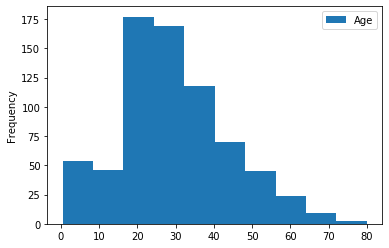

In [23]:
data.plot(kind='hist', y=['Age'])
plt.show()

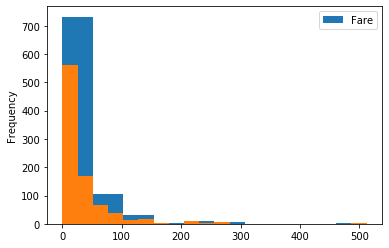

In [50]:
data.plot(kind='hist', y=['Fare'])
data['Fare'].plot(kind = 'hist', bins= 20)
plt.show()

문제4) 불필요한 변수를 제거하시오. (PassengerId, Name)

In [32]:
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southhampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southhampton
3,1,1,female,35.0,53.1000,Southhampton
4,0,3,male,35.0,8.0500,Southhampton


문제5) 범주형 변수(Pclass, Sex, Embarked)에 대해서 가변수화를 수행하고 숫자형 변수와 합치시오.  
합친 후 기존 범주형 변수는 제거하시오

In [51]:
dummy_fields = ['Pclass', 'Sex', 'Embarked']
for each in dummy_fields:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)
    
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southhampton
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton,0,0,1,0,1,0,0,1


문제6) 숫자형변수에 대해서 Scaling을 수행하시오.  
방식은 Normalization(Min-Max)방식 

In [52]:
quant_features = ['Age', 'Fare']

scaled_features = {}

for each in quant_features:
    max_v, min_v = data[each].max(), data[each].min()
    scaled_features[each] = [max, min]
    data.loc[:, each] = (data[each] - min_v)/(max_v - min_v)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southhampton
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,0.014151,Southhampton,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.139136,Cherbourg,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0.015469,Southhampton,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.103644,Southhampton,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0.015713,Southhampton,0,0,1,0,1,0,0,1


In [53]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southhampton
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.367921,0.062858,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.182540,0.096995,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.247612,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.346569,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,0.472229,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
